# Analysis of River Dynamics During Wet and Dry Seasons 

This analysis aims to investigate the dynamics of the Nile River during its wet and dry seasons by using satellite imagery. I plan to compare these images to identify and measure the differences in river characteristics during these seasons. This will help understand how the Nile varies throughout the year

### Problem Definition.
Rivers are dynamic systems that can exhibit significant changes due to seasonal variations in precipitation and runoff. The Nile River, one of the longest rivers in the world, experiences noticeable differences between its wet and dry seasons. During the wet season, increased rainfall causes the river to swell, expanding its width and increasing its water level. In contrast, the dry season brings less rainfall, which results in lower water levels and a narrower river. These fluctuations are crucial to understand because they affect both the river's ecosystem and the communities depending on it.

### Area Description.
The analysis will focus on specific segments of the Nile River basin, particularly in Sudan, where the river's seasonal variations are most pronounced. By leveraging satellite imagery from different time periods, I aim to:
- measure and compare the river width during wet and dry seasons.
- assess the impact of seasonal changes on surrounding vegetation.

Used bands:
- B02 (Blue)
- B03 (Green)
- B04 (Red)
- B08 (Near Infrared)

### Importing necessary libraries.

In [1]:
import rasterio
from rasterio.plot import show, show_hist
from matplotlib import pyplot as plt
import os 
import numpy as np
from PIL import Image
from ipywidgets import interact


The map bellow shows the location of Khartoum in Sudan. The inset map highlights the specific region where the Blue Nile and White Nile converge. This strategic location provides valuable insights into the seasonal variations of the river system, which are crucial for understanding the broader impacts on the Nile River basin.

By looking at satellite pictures of Khartoum during different seasons, we can learn how this area changes over the year. This helps us understand the river better and manage its water resources more effectively.

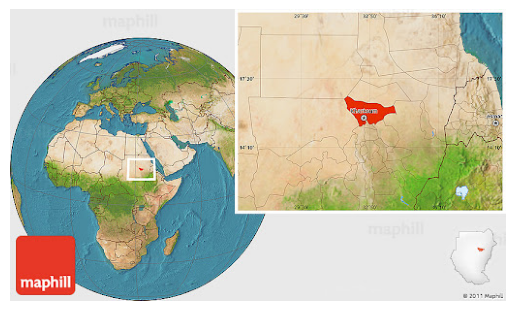

In [20]:
im = Image.open('Khartoum.jpg')
plt.imshow(im)
plt.axis('off');

### Importing images
path1 and path2 store the directory paths for the images corresponding to the two dates.

For the months February and August the code opens the Sentinel-2 bands B02 (Blue), B03 (Green), B04 (Red), B08 (Near Infrared), and the true color image using the rasterio library.

In [21]:
path1 = "6.02.2023"
path2 = "15.08.2023"

feb_B02 = rasterio.open(os.path.join(path1, "2023-02-06-00_00_2023-02-06-23_59_Sentinel-2_L2A_B02_(Raw).tiff"))
feb_B03 = rasterio.open(os.path.join(path1, "2023-02-06-00_00_2023-02-06-23_59_Sentinel-2_L2A_B03_(Raw).tiff"))
feb_B04 = rasterio.open(os.path.join(path1, "2023-02-06-00_00_2023-02-06-23_59_Sentinel-2_L2A_B04_(Raw).tiff"))
feb_B08 = rasterio.open(os.path.join(path1, "2023-02-06-00_00_2023-02-06-23_59_Sentinel-2_L2A_B08_(Raw).tiff"))
feb_tc = rasterio.open(os.path.join(path1, "2023-02-06-00_00_2023-02-06-23_59_Sentinel-2_L2A_True_color.tiff"))

aug_B02 = rasterio.open(os.path.join(path2, "2023-08-15-00_00_2023-08-15-23_59_Sentinel-2_L2A_B02_(Raw).tiff"))
aug_B03 = rasterio.open(os.path.join(path2, "2023-08-15-00_00_2023-08-15-23_59_Sentinel-2_L2A_B03_(Raw).tiff"))
aug_B04 = rasterio.open(os.path.join(path2, "2023-08-15-00_00_2023-08-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff"))
aug_B08 = rasterio.open(os.path.join(path2, "2023-08-15-00_00_2023-08-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff"))
aug_tc = rasterio.open(os.path.join(path2, "2023-08-15-00_00_2023-08-15-23_59_Sentinel-2_L2A_True_color.tiff"))

### Visualizing Data
This code provides a function to visualize two images side by side. The function plot_images takes two images as inputs, creates a figure with two subplots, and displays each image in its respective subplot. The function also returns the axes objects for further customization if needed.

In [22]:
def plot (feb, aug):
    plt.figure(figsize = (12,6))
    ax1 = plt.subplot(1,2,1)
    ax1.imshow(feb, vmin = 0, vmax=255)
    ax1.axis('off')

    ax2 = plt.subplot(1,2,2)
    ax2.imshow(aug, vmin = 0, vmax=255)
    ax2.axis('off')

    return ax1, ax2

This code provides a function to visualize the histograms of pixel values from two images side by side. The function plot_histograms takes two images as inputs, creates a figure with two subplots, and displays the histograms of each image in its respective subplot. This is useful for comparing the distribution of pixel values between the two images.

In [23]:
def hist (image1, image2):
    plt.figure(figsize = (12,6))
    ax1 = plt.subplot(1,2,1)
    ax1.set_title("Histogram - Wet Season")
    plt.hist(image1.flatten(), bins = 255, alpha = 0.5)
    plt.hist(image2.flatten(), bins = 255, alpha = 0.5)

### Reading Data
This code reads the true color images and individual bands for February and August into numpy arrays. 

In [24]:
feb_tc_np = feb_tc.read()
aug_tc_np = aug_tc.read()
feb_B02_np = feb_B02.read()
feb_B03_np = feb_B03.read()
feb_B04_np = feb_B04.read()
feb_B08_np = feb_B08.read()

aug_B02_np = aug_B02.read()
aug_B03_np = aug_B03.read()
aug_B04_np = aug_B04.read()
aug_B08_np = aug_B08.read()

### Analyzing Data
This code analyzes true color images for February and August, displaying their shapes, types, and metadata, and printing the maximum and minimum pixel values before normalization. 


In [25]:
print(f"February, true color image shape: {feb_tc_np.shape}")
print(f"August, true color image shape: {aug_tc_np.shape}")

print(f"\nType of original objects:")
print(f"February: {type(feb_tc)},\nAugust: {type(aug_tc)}")
print(f"\nType of numpy arrays:")
print(f"February: {type(feb_tc_np)},\nAugust: {type(aug_tc_np)}")
print(f"\nMetadata for February image:\n {feb_tc.meta}\n Metadata for August image:\n {aug_tc.meta}")

print(f"\nBefore normalization:\nFebruary: Max value: {feb_tc_np.max()}, min value {feb_tc_np.min()}")
print(f"August: Max value: {aug_tc_np.max()}, min value {aug_tc_np.min()}")

February, true color image shape: (3, 2438, 2498)
August, true color image shape: (3, 2438, 2498)

Type of original objects:
February: <class 'rasterio.io.DatasetReader'>,
August: <class 'rasterio.io.DatasetReader'>

Type of numpy arrays:
February: <class 'numpy.ndarray'>,
August: <class 'numpy.ndarray'>

Metadata for February image:
 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2498, 'height': 2438, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.997638110488141e-05, 0.0, 32.40532,
       0.0, -8.998441345365106e-05, 15.678577)}
 Metadata for August image:
 {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 2498, 'height': 2438, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.997638110488141e-05, 0.0, 32.40532,
       0.0, -8.998441345365106e-05, 15.678577)}

Before normalization:
February: Max value: 63052, min value 0
August: Max value: 64944, min value 0


### Normalizing Data and Visualizing Images
This code performs the normalization of true color images, scaling the pixel values to a range between 0 and 1. It then prints the normalized values and displays the normalized images side by side.


After normalization:
February: Max value: 1.0, min value 0.0
August: Max value: 1.0, min value 0.0


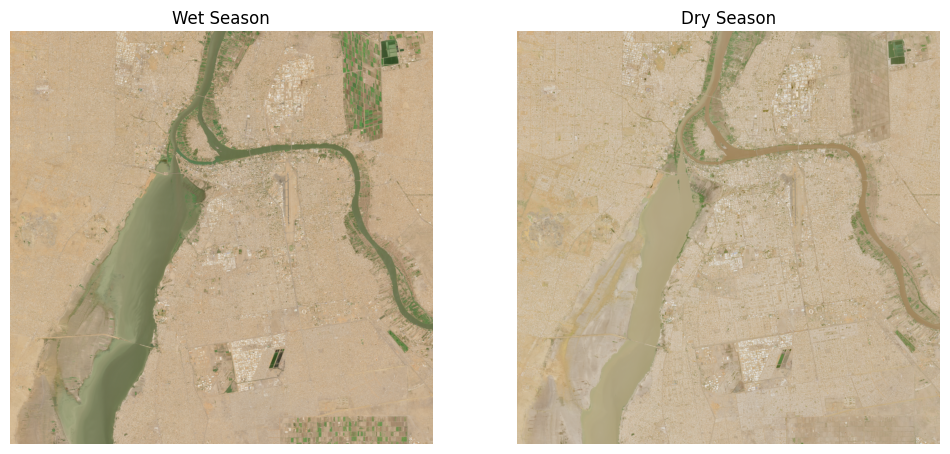

In [26]:
feb_tc_np = feb_tc_np/feb_tc_np.max()
aug_tc_np = aug_tc_np/aug_tc_np.max()

print(f"\nAfter normalization:\nFebruary: Max value: {feb_tc_np.max()}, min value {feb_tc_np.min()}")
print(f"August: Max value: {aug_tc_np.max()}, min value {aug_tc_np.min()}")

ax1, ax2 = plot(feb_tc_np.transpose(1,2,0), aug_tc_np.transpose(1,2,0))
ax1.set_title("Wet Season");
ax2.set_title("Dry Season");

### Visualizing Histograms
This code generates and visualizes the histograms of the pixel values for the normalized true color images of February and August. By flattening the 3D image arrays into 1D arrays, we can plot the distribution of pixel values for both images on the same histogram for easy comparison.

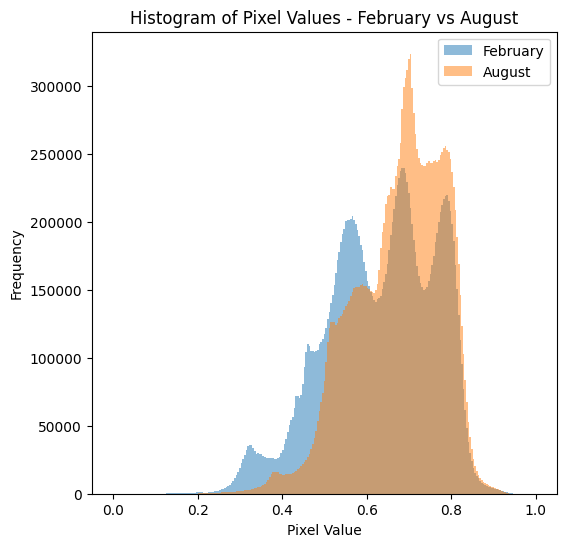

In [27]:
plt.figure(figsize = (6,6))
plt.title("Histogram of Pixel Values - February vs August")
plt.hist(feb_tc_np.flatten(), bins = 255, alpha = 0.5, label='February');
plt.hist(aug_tc_np.flatten(), bins = 255, alpha = 0.5, label='August');

plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend();

### Plotting Histograms of Band Data for February and August
The following code combines the individual band data for February and August into a single array for each month. It then plots histograms of pixel values for each band to compare the distributions of pixel values between the wet season (February) and the dry season (August).

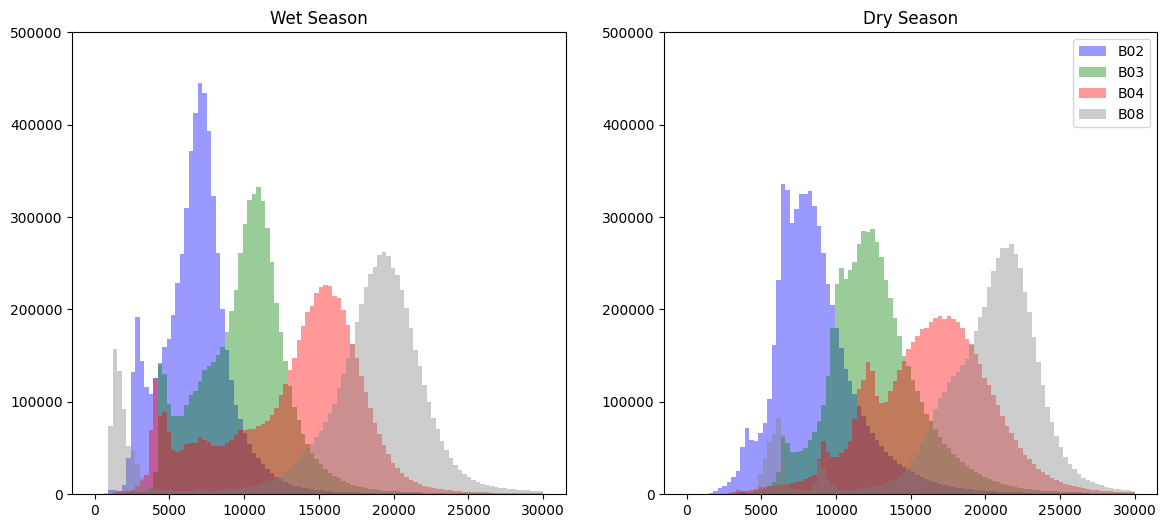

In [35]:
feb_all_bands = np.concatenate((feb_B02_np, feb_B03_np, feb_B04_np, feb_B08_np), axis=0)
aug_all_bands = np.concatenate((aug_B02_np, aug_B03_np, aug_B04_np, aug_B08_np), axis=0)

plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
ax1.set_title("Wet Season")
ax1.hist(feb_all_bands[0,:,:].flatten(), range = (0, 30000), bins = 100, color = 'blue', alpha = 0.4, label='B02') 
ax1.hist(feb_all_bands[1,:,:].flatten(), range = (0, 30000), bins = 100, color = 'green', alpha = 0.4, label='B03') 
ax1.hist(feb_all_bands[2,:,:].flatten(), range = (0, 30000), bins = 100, color = 'red', alpha = 0.4, label='B04') 
ax1.hist(feb_all_bands[3,:,:].flatten(), range = (0, 30000), bins = 100, color = 'gray', alpha = 0.4, label='B08') 
ax1.set_ylim(0, 500000)

ax2 = plt.subplot(1,2,2)
ax2.set_title("Dry Season")
ax2.hist(aug_all_bands[0,:,:].flatten(), range = (0, 30000), bins = 100, color = 'blue', alpha = 0.4, label='B02') 
ax2.hist(aug_all_bands[1,:,:].flatten(), range = (0, 30000), bins = 100, color = 'green', alpha = 0.4, label='B03') 
ax2.hist(aug_all_bands[2,:,:].flatten(), range = (0, 30000), bins = 100, color = 'red', alpha = 0.4, label='B04') 
ax2.hist(aug_all_bands[3,:,:].flatten(), range = (0, 30000), bins = 100, color = 'gray', alpha = 0.4, label='B08') 
ax2.set_ylim(0, 500000)
plt.legend()
plt.show()

As seen above the histograms represent the distribution of pixel values for four different bands (B02, B03, B04, B08) during the wet and dry seasons. Each band is color-coded and shows how the pixel values are distributed across the specified range (0 to 30000). 

### Detailed Analysis
##### Wet Season (Left Histogram)
- B02 (Blue): This band shows a prominent peak in pixel values between 5000 and 10000. This indicates that during the wet season, a significant number of pixels fall within this range for the B02 band. The peak frequency reaches approximately 450,000.  
- B03 (Green): This channel shows a peak around 10000 pixel values, with a frequency reaching around 350,000.  
- B04 (Red): The pixel values for this band are more spread out, with a peak between 15000 and 18000 and a frequency of about 250,000. This indicates greater variability in the B04 band during the wet season.  
- B08 (Gray): This band shows a wide distribution with a peak around 20000 to 25000, indicating significant reflection, likely from water or wet surfaces.  

##### Dry Season (Right Histogram)
- B02 (Blue): Similar to the wet season, this band shows a peak in pixel values between 5000 and 10000.
- B03 (Green): The distribution for this band peaks around 10000, slightly lower than in the wet season, indicating a shift towards lower pixel values.
- B04 (Red): This band shows a peak between 15000 and 18000, indicating that pixel values are generally lower and less variable compared to the wet season.
- B08 (Gray): This band shows a wide distribution with a peak around 20000 to 25000. The frequency is quite similar to the wet season, suggesting that the number of pixels with these values remains roughly the same across both seasons.

##### Conclusions
- Wet Season: Histograms show higher frequencies and wider distributions, indicating a substantial presence of water and vegetation. Peaks in the B02 and B08 channels suggest strong reflections from water, while peaks in B03 and B04 indicate significant vegetation.
- Dry Season: Histograms show lower frequencies and narrower distributions, indicating reduced water and vegetation presence. The peaks are lower and more concentrated, reflecting the dry conditions with less moisture and vegetative cover.

### Function to Convert 16-bit Images to 8-bit
The uint16to8 function is designed to convert 16-bit satellite image data to 8-bit format. 

In [29]:
def uint16to8(image):

    plt.figure(figsize=(12, 6))
    ax1 = plt.subplot(1,2,1)
    ax1.hist(image[0,:,:].flatten(), range = (0, 30000), bins = 100, color = 'blue', alpha = 0.4) 
    ax1.hist(image[1,:,:].flatten(), range = (0, 30000), bins = 100, color = 'green', alpha = 0.4) 
    ax1.hist(image[2,:,:].flatten(), range = (0, 30000), bins = 100, color = 'red', alpha = 0.4) 
    ax1.hist(image[3,:,:].flatten(), range = (1000, 30000), bins = 100, color = 'gray', alpha = 0.4) 

    image = image.astype(float)
    vmaxB2 = np.quantile(image[0,:,:].flatten(), 0.99)
    vminB2 = np.quantile(image[0,:,:].flatten(), 0.01) 
    vmaxB3 = np.quantile(image[1,:,:].flatten(), 0.99)  
    vminB3 = np.quantile(image[1,:,:].flatten(), 0.01)  
    vmaxB4 = np.quantile(image[2,:,:].flatten(), 0.99)  
    vminB4 = np.quantile(image[2,:,:].flatten(), 0.01)  
    vmaxB8 = np.quantile(image[3,:,:].flatten(), 0.99)  
    vminB8 = np.quantile(image[3,:,:].flatten(), 0.01)  

    image[0,:,:] = (image[0,:,:] - vminB2)/(vmaxB2 - vminB2)
    image[1,:,:] = (image[1,:,:] - vminB3)/(vmaxB3 - vminB3)
    image[2,:,:] = (image[2,:,:] - vminB4)/(vmaxB4 - vminB4)
    image[3,:,:] = (image[3,:,:] - vminB8)/(vmaxB8 - vminB8)

    image[image < 0] = 0
    image[image > 1] = 1
    image = (image*255).astype(np.uint8)


    ax2 = plt.subplot(1,2,2)
    ax2.hist(image[0,:,:].flatten(), bins = 100, color = 'blue', alpha = 0.4) 
    ax2.hist(image[1,:,:].flatten(), bins = 100, color = 'green', alpha = 0.4) 
    ax2.hist(image[2,:,:].flatten(), bins = 100, color = 'red', alpha = 0.4) 
    ax2.hist(image[3,:,:].flatten(), bins = 100, color = 'gray', alpha = 0.4) 
    plt.show()

    return image 

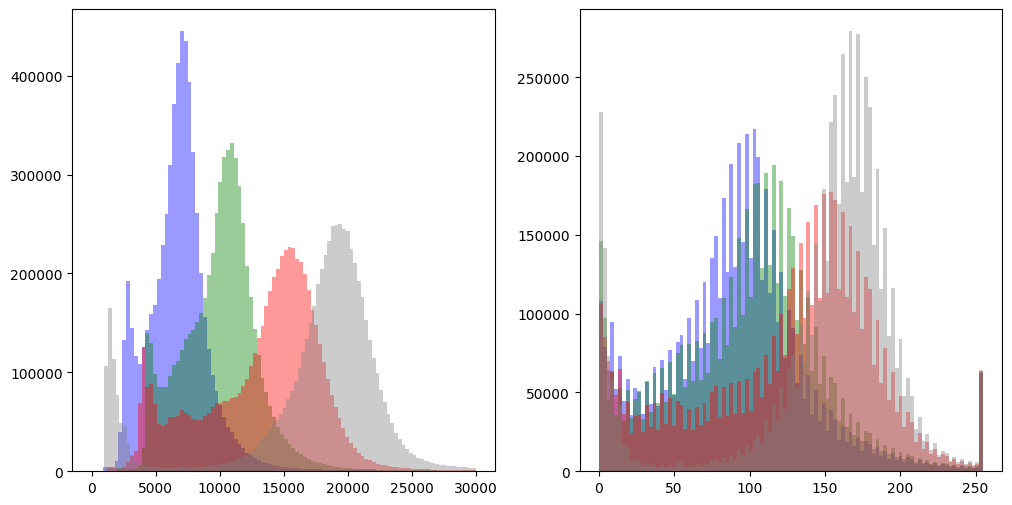

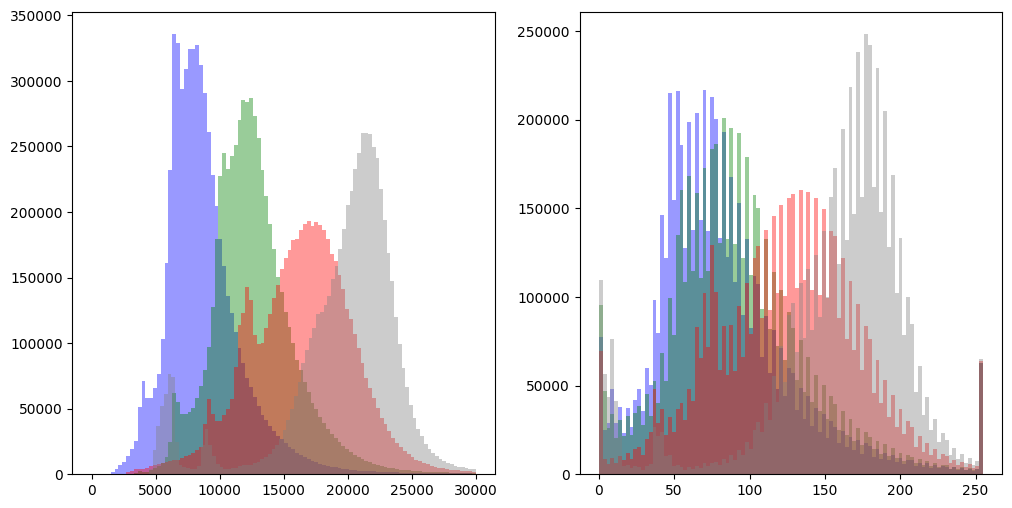

In [13]:
feb_uint8 = uint16to8(feb_all_bands)
aug_uint8 = uint16to8(aug_all_bands)

### Visualizing RGB Images
Here we are visualizing the RGB composites of Sentinel-2 imagery for February and August to get a true color representation of the area. The RGB composite is created using the Red (B04), Green (B03), and Blue (B02) bands

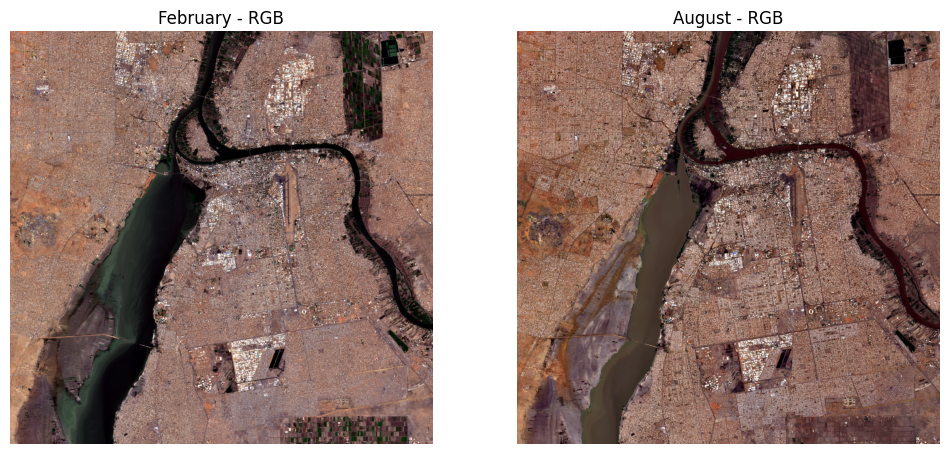

In [30]:
feb_RGB = feb_uint8[(2,1,0), :, :]
feb_RGB = feb_RGB.swapaxes(0,1).swapaxes(1,2)

aug_RGB = aug_uint8[(2,1,0), :, :]
aug_RGB = aug_RGB.swapaxes(0,1).swapaxes(1,2)
ax1, ax2 = plot(feb_RGB, aug_RGB)
ax1.set_title("February - RGB");
ax2.set_title("August - RGB");

## NDVI (Normalized Difference Vegetation Index):
NDVI is used to analyze and monitor plant growth, vegetation cover, and biomass production. It is calculated as:
NDVI = (NIR - Red) * (NIR + Red)

NIR (Near-Infrared Band): Typically, Band 8 (B08) in Sentinel-2 imagery.
Red Band: Typically, Band 4 (B04) in Sentinel-2 imagery.

In this section, we calculate and visualize the Normalized Difference Vegetation Index (NDVI) for February and August.

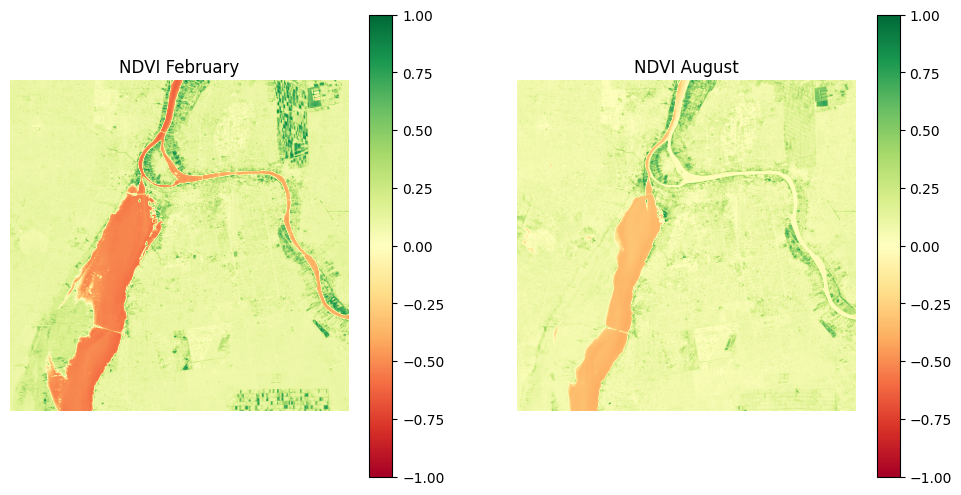

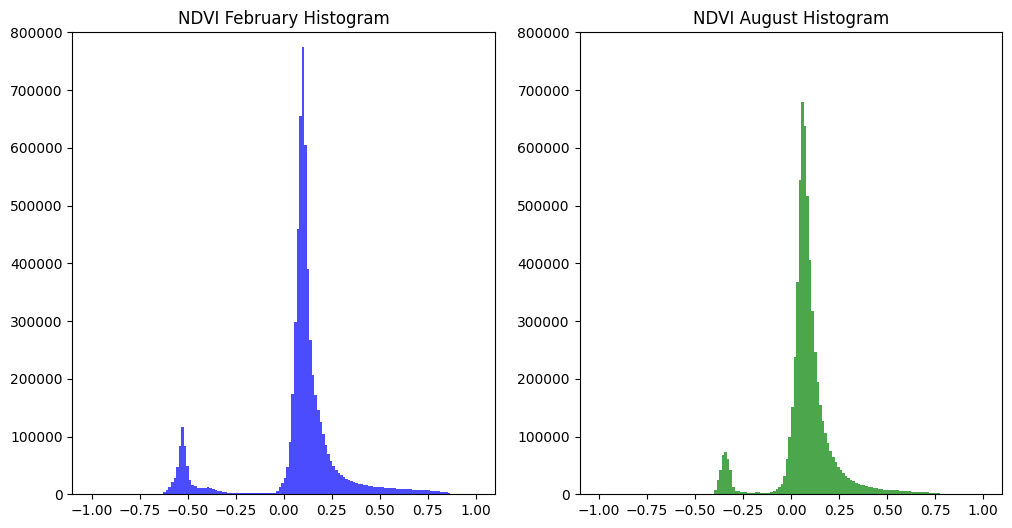

In [31]:
feb_index = feb_all_bands.copy()
aug_index = aug_all_bands.copy()

feb_index = feb_all_bands.astype(np.float32)
aug_index = aug_all_bands.astype(np.float32)

ndvi_feb = (feb_index[3,:,:] - feb_index[2,:,:])/(feb_index[3,:,:] + feb_index[2,:,:])
ndvi_aug = (aug_index[3,:,:] - aug_index[2,:,:])/(aug_index[3,:,:] + aug_index[2,:,:])

plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
im1 = ax1.imshow(ndvi_feb, cmap='RdYlGn', vmin=-1, vmax=1)
ax1.set_title('NDVI February')
ax1.axis('off')

plt.colorbar(im1, ax=ax1)

ax2 = plt.subplot(1,2,2)
im2 = ax2.imshow(ndvi_aug, cmap='RdYlGn', vmin=-1, vmax=1)
ax2.set_title('NDVI August')
ax2.axis('off')
plt.colorbar(im1, ax=ax2)


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(ndvi_feb.flatten(), range = (-1,1), bins=150, color='blue', alpha=0.7)
ax1.set_title('NDVI February Histogram')
ax1.set_ylim(0, 800000)

ax2 = plt.subplot(1, 2, 2)
ax2.hist(ndvi_aug.flatten(),  range = (-1,1), bins=150, color='green', alpha=0.7)
ax2.set_title('NDVI August Histogram')
ax2.set_ylim(0, 800000)
plt.show()

### Detailed Analysis
In February, the histogram shows a prominent peak around 0.15, suggesting a significant number of pixels with low to moderate vegetation activity. There is also a smaller peak around -0.5, representing non-vegetated surfaces such as water bodies or urban areas. The overall range of NDVI values in February primarily falls between -0.75 and 0.25, with a concentration of values near 0.0 to 0.25, indicating sparse vegetation or bare soil during this month.

The August histogram shows a similar peak around 0.15 but with a lower concentration of pixels in this range, indicating decreased vegetation activity compared to February. The negative NDVI values also exhibit a noticeable peak around -0.5, again representing non-vegetated areas such as water bodies, but is lower compared to February. The distribution of NDVI values in August shifts less towards positive values, ranging from -1.0 to 0.5, reflecting an overall decrease in vegetation during the dry season.


These histograms collectively illustrate seasonal variability in vegetation, with a noticeable decrease in NDVI values from February to August, indicating reduced vegetation activity during the dry season. Despite the overall reduction in vegetation, a significant portion of the area remains non-vegetated. This analysis provides a clear picture of changes in vegetation health and distribution between these two periods, highlighting the seasonal dynamics of plant growth and the persistent presence of water bodies.

### NDWI (Normalized Difference Water Index):
NDWI is designed to enhance the presence of water bodies by using green and near-infrared (NIR) bands. It is particularly useful for monitoring water content in water bodies like rivers, lakes, and wetlands. It is calculated as:
NDWI = (NIR - Green) * (NIR - Green)

Green Band: Typically, Band 3 (B03) in Sentinel-2 imagery.
NIR (Near-Infrared Band): Typically, Band 8 (B08) in Sentinel-2 imagery.

In this section, we calculate and visualize the Normalized Difference Water Index (NDWI) for February and August.

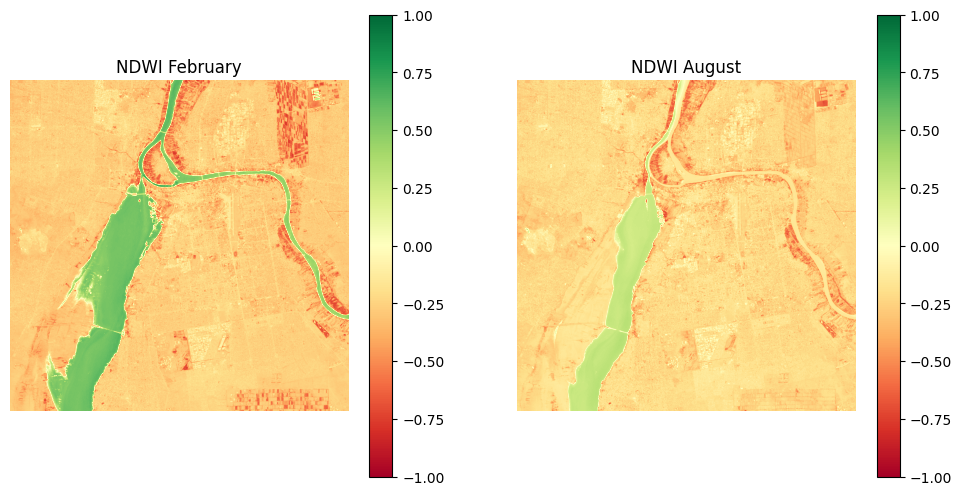

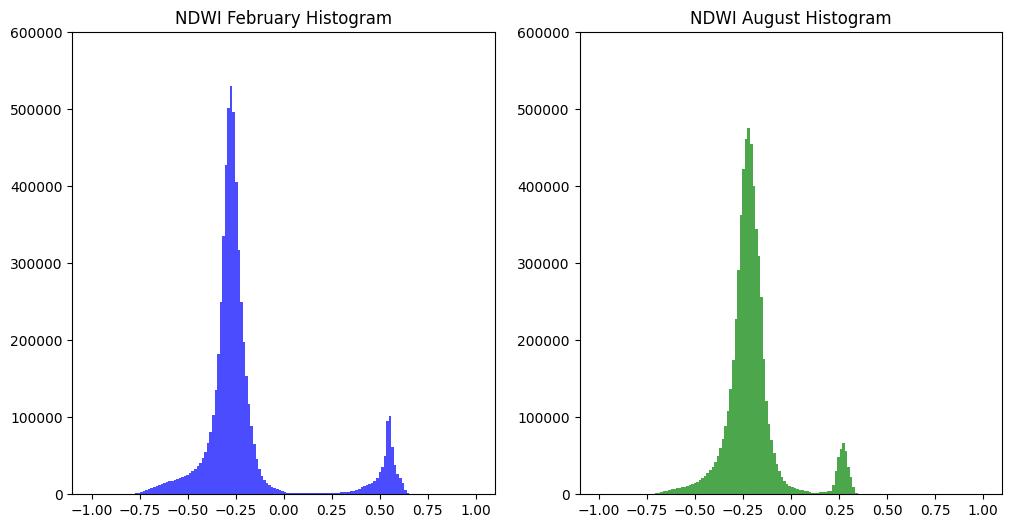

In [32]:
feb_index = feb_all_bands.copy()
aug_index = aug_all_bands.copy()

feb_index = feb_all_bands.astype(np.float32)
aug_index = aug_all_bands.astype(np.float32)

ndwi_feb = (feb_index[1,:,:] - feb_index[3,:,:]) / (feb_index[1,:,:] + feb_index[3,:,:])
ndwi_aug = (aug_index[1,:,:] - aug_index[3,:,:]) / (aug_index[1,:,:] + aug_index[3,:,:])


plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
im1 = ax1.imshow(ndwi_feb, cmap='RdYlGn', vmin=-1, vmax=1)
ax1.set_title('NDWI February')
ax1.axis('off')
plt.colorbar(im1, ax=ax1)

ax2 = plt.subplot(1,2,2)
im2 = ax2.imshow(ndwi_aug, cmap='RdYlGn', vmin=-1, vmax=1)
ax2.set_title('NDWI August')
ax2.axis('off')
plt.colorbar(im1, ax=ax2)


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(ndwi_feb.flatten(), range = (-1,1), bins=150, color='blue', alpha=0.7)
ax1.set_title('NDWI February Histogram')
ax1.set_ylim(0, 600000)

ax2 = plt.subplot(1, 2, 2)
ax2.hist(ndwi_aug.flatten(),  range = (-1,1), bins=150, color='green', alpha=0.7)
ax2.set_title('NDWI August Histogram')
ax2.set_ylim(0, 600000)
plt.show()


### Detailed Analysis
In February, the histogram shows a prominent peak around -0.25, suggesting that most pixels represent non-water surfaces, such as vegetation or bare soil. A noticeable smaller peak around 0.5 points to water bodies. The map confirms this, showing significant water areas concentrated in valleys and around rivers.

In August, the peak around -0.25 persists but with slightly lower concentration, indicating decreased moisture during the dry season. The peak around 0.25, which is less pronounced than in February, suggests a reduction in water bodies. The map shows a decrease in water coverage compared to February.

February has a more noticeable peak around 0.25, indicating more water presence, which diminishes in August.
These histograms and maps highlight seasonal changes in water content, with a decrease from February to August, consistent with the dry season. This analysis provides a clear picture of the dynamic shifts in water availability and surface moisture between these two periods.

### Visualizing Water Areas
Here we are visualizing the water areas for February (wet season) and August (dry season) using NDWI (Normalized Difference Water Index) thresholding. The threshold is set to 0.15, which helps distinguish water from non-water areas.

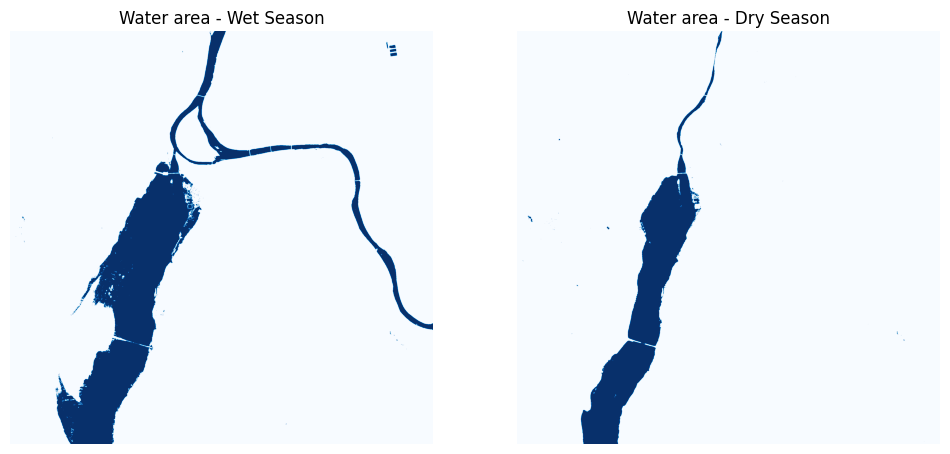

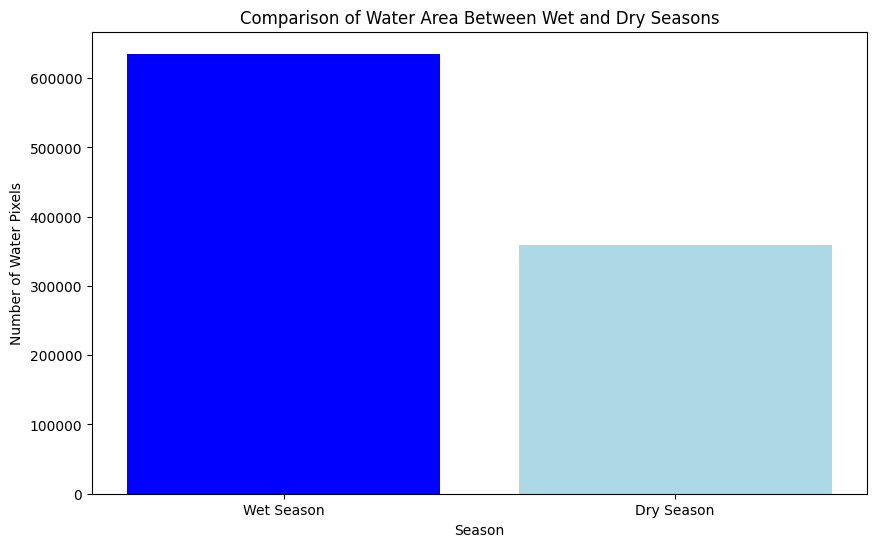

In [33]:
threshold = 0.15

feb_water = ndwi_feb > threshold
aug_water = ndwi_aug > threshold

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(feb_water, cmap='Blues')
plt.title("Water area - Wet Season")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_water, cmap='Blues')
plt.title("Water area - Dry Season")
plt.axis('off')
plt.show()

feb_water_count = np.sum(feb_water)
aug_water_count = np.sum(aug_water)

seasons = ['Wet Season', 'Dry Season']
water_counts = [feb_water_count, aug_water_count]

plt.figure(figsize=(10, 6))
plt.bar(seasons, water_counts, color=['blue', 'lightblue'])
plt.title('Comparison of Water Area Between Wet and Dry Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Water Pixels')
plt.show()



### Detailed Analysis

The provided bar chart and images illustrate the significant differences in water areas between the wet and dry seasons. In the bar chart, the wet season (represented by over 600,000 water pixels) shows a substantially larger water area compared to the dry season, which has around 350,000 water pixels. This stark contrast is visually evident in the images as well. The wet season image displays extensive water coverage, including rivers and floodplains marked in blue, while the dry season image shows significantly reduced water areas, primarily limited to the main river channels with much of the floodplain dry.

### Calculating Areas
The provided code snippet calculates the water area for both the wet and dry seasons and then computes the difference between these areas.

In [34]:
pixel_area = 10

feb_water_area = feb_water_count * pixel_area
aug_water_area = aug_water_count * pixel_area

difference_area = feb_water_area - aug_water_area

print(f"Water area - wet season {feb_water_area} m²")
print(f"Water area - dry season: {aug_water_area} m²")
print(f"Difference between two areas: {difference_area} m²")

Water area - wet season 6353800 m²
Water area - dry season: 3584510 m²
Difference between two areas: 2769290 m²


### Interpretation of Results
The water area during the wet season is significantly larger than in the dry season, with a difference of 2,769,290 m². This substantial increase is likely due to higher precipitation and reduced evaporation rates during the wet season, which results in more extensive water bodies, including rivers, lakes, and floodplains.  
  
During the dry season, the water area decreases to 3,584,510 m². This reduction is primarily caused by lower rainfall and higher evaporation rates, which lead to a significant decrease in the surface water levels. Many smaller water bodies might dry up entirely, and larger bodies of water, such as rivers and lakes, can shrink significantly.

### Summary
This project analyzed the seasonal variation in water area along the Nile River near Khartoum using NDWI, NDVI and satellite imagery for February (wet season) and August (dry season).

The analysis yielded the following key results:  
Water Area in Wet Season (February): 6,353,800 m²  
Water Area in Dry Season (August): 3,584,510 m²  
Difference: 2,769,290 m²  
These findings highlight a significant seasonal variation in the water area of the Nile River near Khartoum. These results show a significant increase in water area during the wet season due to higher rainfall and lower evaporation, and a substantial decrease during the dry season due to lower rainfall and higher evaporation.  

##### Implications
The seasonal variation affects local ecosystems. During the wet season, the increased water area supports diverse aquatic habitats and provides essential resources for wildlife. In contrast, the dry season can stress these ecosystems, reducing available habitats and water resources, potentially affecting biodiversity and ecosystem health. Understanding these dynamics helps manage water resources effectively. Storing water during the wet season can mitigate dry season shortages and manage flood risks. Farmers can optimize irrigation and crop management based on water availability, enhancing yields and food security.    

### Conclusion
In conclusion, this project underscores the importance of understanding seasonal water dynamics in the Nile River near Khartoum. The significant differences in water area between the wet and dry seasons highlight the need for adaptive management strategies to address the challenges posed by these variations. Effective water resource management, environmental conservation, and agricultural planning are essential to sustain the livelihoods and ecosystems dependent on the Nile River's water resources.